In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [12]:
softmax = torch.load(open("softmax.pt", "rb")).cpu().tolist()[:-1]
square = torch.load(open("square.pt", "rb")).cpu().tolist()
time = range(8192 - len(softmax), 8192)

In [13]:
len(softmax), len(square), len(time)

(8184, 8184, 8184)

In [34]:
softmax_mb = np.array(softmax)*4 / 1e6 / 24
square_mb = np.array(square)*4 / 1e6 / 24

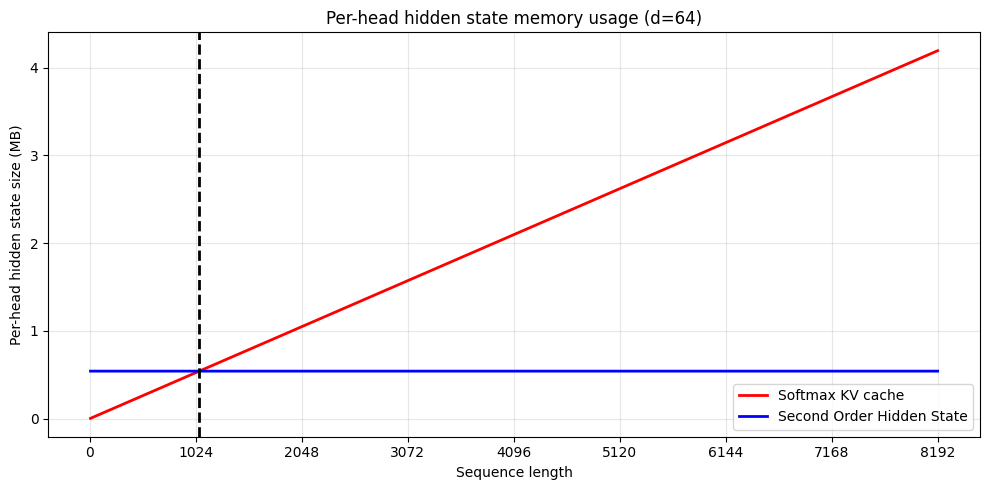

In [44]:
# Create plot
plt.figure(figsize=(10, 5))

plt.plot(time, softmax_mb, label="Softmax KV cache", linewidth=2, color="red")
plt.plot(time, square_mb, label="Second Order Hidden State", linewidth=2, color="blue")

# Vertical reference line
plt.axvline(x=1058, linestyle="--", linewidth=2, color="black")

# Labels and title
plt.xlabel("Sequence length")
plt.ylabel("Per-head hidden state size (MB)")
plt.title("Per-head hidden state memory usage (d=64)")

# Grid and legend
plt.grid(True, alpha=0.3)
plt.legend()

# X-axis ticks at 1024 intervals
xmin = min(time)
xmax = max(time)
plt.xticks(range((xmin // 1024) * 1024, xmax + 2, 1024))

plt.tight_layout()
plt.savefig("hidden_state_memory.svg", format="svg", bbox_inches="tight")
plt.show()
